### dspsr PFB inversion validation

The purpose of this notebook is to validate dspsr's PFB inversion implementation. 

In order to determine the validity of the implementation, we're going to compare 
"vanilla" dspsr to the PFB inversion case. Vanilla dspsr is the result of passing 
data through dspsr without performing any filterbank operations. The vanilla case 
simply convolves the input signal with a dedispersion kernel, detects the pulsar, 
and folds it. 

We're going to look at dspsr "dumps". These dumps show the state of the input time 
series at a specified point in the signal processing pipeline. We can generate these 
files with the `-dump` argument in dspsr. If I want to see the state of the time series 
before the Detection operation, I would pass `-dump Detection` to dspsr. 

In [1]:
%matplotlib notebook

import os 
import sys 

import numpy as np 
import scipy.signal
import matplotlib.pyplot as plt


pfb_channelizer_path = f"{os.path.expanduser('~')}/ska/pfb-channelizer"

sys.path.insert(0, pfb_channelizer_path)

from src.util import load_dada_file
from src.rational import Rational
from src.formats import DADAFile

base_dir = f"{os.path.expanduser('~')}/mnt/ozstar/projects/PST_Matlab_pulsar_signal_processing_model_CDR"



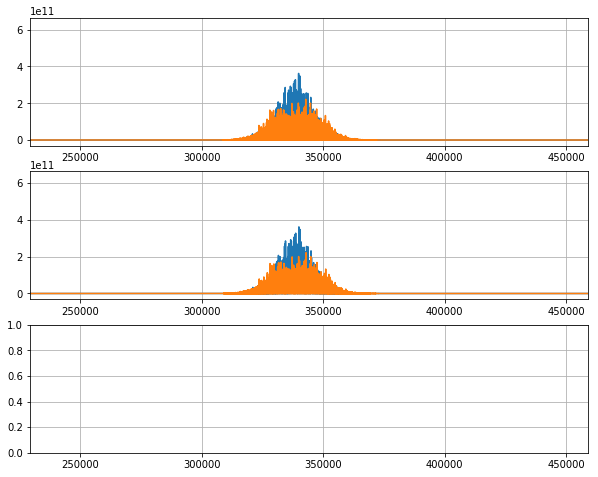

In [2]:
vanilla_dspsr_dump = [DADAFile(f) for f in ["pre_Fold.vanilla.pulsar.10.dump"]]
pfb_inversion_os_dump = [DADAFile(f) for f in ["pre_Fold.py.inverse.pulsar.10.os.dump"]]

vanilla_dspsr_dump[0].load_data()
pfb_inversion_os_dump[0].load_data()

os_factor = Rational(*pfb_inversion_os_dump[0]["OS_FACTOR"].split("/"))

# pfb_inversion_os_dump[0]._data /= float(os_factor)**2
fft_size = 229466
plot_size = -1 # for faster plotting

xlim = [fft_size, 2*fft_size]


fig, axes = plt.subplots(3, 1, figsize=(10,8))


for i in range(axes.shape[0]):
    axes[i].grid(True)
    axes[i].set_xlim(xlim)
    
van = 0
axes[van].plot(vanilla_dspsr_dump[0].data[:plot_size,0,0,0]); 
axes[van].plot(vanilla_dspsr_dump[0].data[:plot_size,0,0,1]); 

inv = 1
axes[inv].plot(pfb_inversion_os_dump[0].data[:plot_size,0,0,0]);
axes[inv].plot(pfb_inversion_os_dump[0].data[:plot_size,0,0,1]);

# xcorr = scipy.signal.fftconvolve(

#     vanilla_dspsr_dump[0].data[:plot_size,0,0,0], 
#     np.conj(pfb_inversion_os_dump[0].data[:plot_size,0,0,0]),
#     mode="full"   
# )

# axes[inv+1].plot(np.abs(xcorr))




